In [2]:
import numpy as np
import matplotlib.pyplot as plt

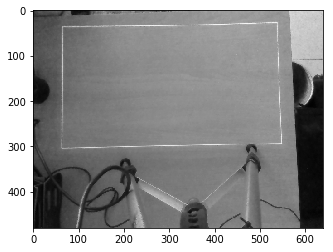

In [36]:
color_img = np.zeros((10,480,640))
diff_img = np.zeros((10,480,640))
diff_new = np.zeros((10,480,640))
background = np.genfromtxt('../dump/background.csv', delimiter=' ')
plt.imshow(np.dstack((background, background, background)))

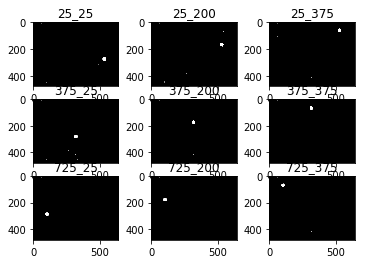

In [37]:
counter = 0
fig,ax =  plt.subplots(3,3)
for i in range(0,3):
    for j in range(0,3):
        xpos = i * 350 + 25
        ypos = j * 175 + 25
        infile = '../dump/' + str(xpos) + '_' + str(ypos) + '.csv'
        color_img[counter:,:] = np.genfromtxt(infile, delimiter=' ')
        infile = '../dump/diff-' + str(xpos) + '_' + str(ypos) + '.csv'
        diff_img[counter,:,:] = np.genfromtxt(infile, delimiter=' ')
        diff_new[counter,:,:] = np.where(np.abs(color_img[counter,:,:] - background) > 0.15, 1, 0)
        ax[i][j].imshow(np.dstack((diff_img[counter,:,:],diff_img[counter,:,:],diff_img[counter,:,:])))
        ax[i][j].set_title(str(xpos) + '_' + str(ypos))
        counter += 1
plt.show()

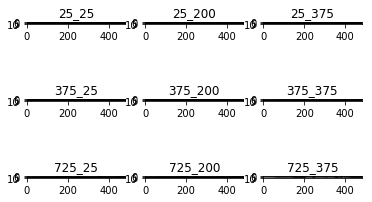

In [30]:
counter = 0
fig,ax =  plt.subplots(3,3)
for i in range(0,3):
    for j in range(0,3):
        xpos = i * 350 + 25
        ypos = j * 175 + 25
        diff_new[counter,:,:] = np.abs(color_img[counter,:,:])
        #diff_new[:,:,counter] = np.where(np.abs(color_img[:,:,counter] - background) > 0.8, 1, 0)
        ax[i][j].imshow(np.dstack((diff_new[:,:,counter],diff_new[:,:,counter],diff_new[:,:,counter])))
        ax[i][j].set_title(str(xpos) + '_' + str(ypos))
        counter += 1
plt.show()

In [57]:
def lookup(color_image, background):
    diff = np.where(np.abs(color_image - background) > 150, color_image, 0)
    index = np.where(diff > 510)
    x = int(np.sum(index[1] / index[1].shape[0]))
    y = int(np.sum(index[0] / index[0].shape[0]))
    return x, y

In [58]:
counter = 0
for i in range(0,3):
    for j in range(0,3):
        xpos = i * 350 + 25
        ypos = j * 175 + 25
        x, y = lookup(color_img[:,:,counter], background)
        print(counter, xpos, ypos, x, y)
        counter += 1

0 25 25 495 227
1 25 200 492 130
2 25 375 490 32
3 375 25 300 231
4 375 200 298 135
5 375 375 296 38
6 725 25 183 153
7 725 200 101 138
8 725 375 101 89


In [16]:
diff_binary = np.where(diff_img > 2.9,255, 0)
color_binary = np.where(color_img > 510,255, 0)
background_binary = np.where(background > 510,255, 0)
diff_new = np.where(np.abs(np.sum(color_img, axis=2) - background > 150, color_img, 0)

SyntaxError: unexpected EOF while parsing (<ipython-input-16-0af623184b32>, line 4)

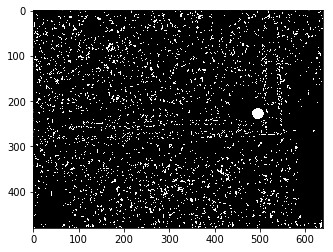

In [27]:
plt.imshow(np.dstack((diff_binary[:,:,0], diff_binary[:,:,0], diff_binary[:,:,0])))

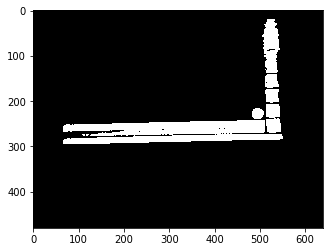

In [31]:
plt.imshow(np.dstack((color_binary[:,:,0], color_binary[:,:,0], color_binary[:,:,0])))

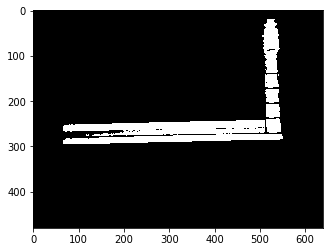

In [34]:
plt.imshow(np.dstack((background_binary, background_binary, background_binary)))

In [12]:
diff_img.max()

715.0